# **Sharvari Lahane**
# **Data Science - Batch May 2024 (Baner, Pune) - Assignment 6**
# **MLR**

**Task 1: Perform Exploratory Data Analysis (EDA)**

Importing Libraries

In [1]:
import pandas as pd

Loading the dataset

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


Displaying the first few rows of the dataset

In [4]:
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


Displaying the summary statistics

In [5]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

Checking for missing values

In [6]:
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing the distribution of the target variable 'Price'

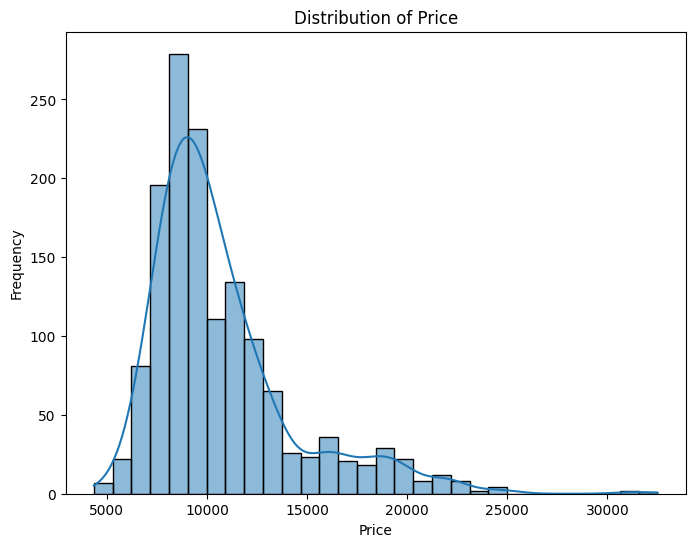

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Visualizing correlations with a heatmap

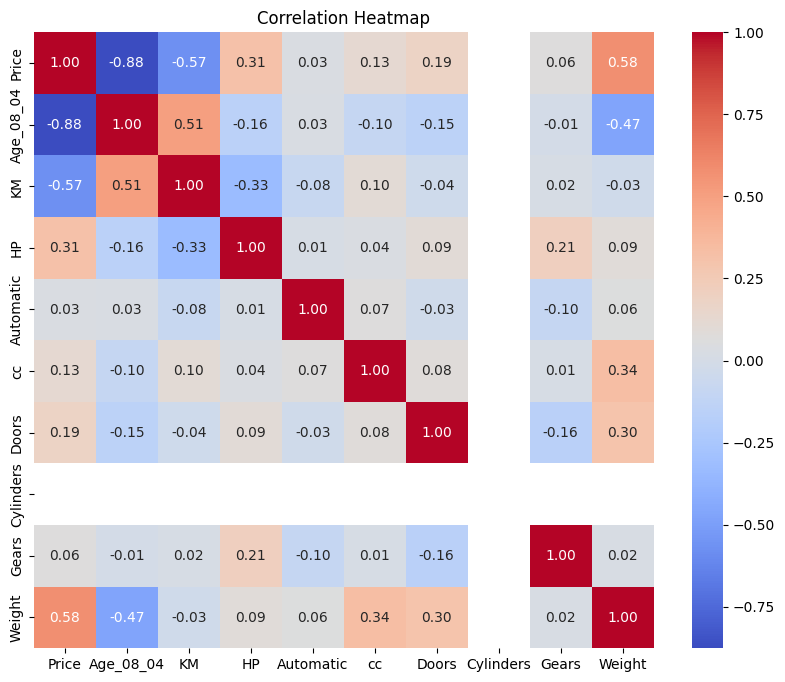

In [10]:
# Drop the categorical column 'Fuel_Type' temporarily
numeric_df = df.drop(['Fuel_Type'], axis=1)

# Create a heatmap with only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Pairplotting to visualize relationships between variables

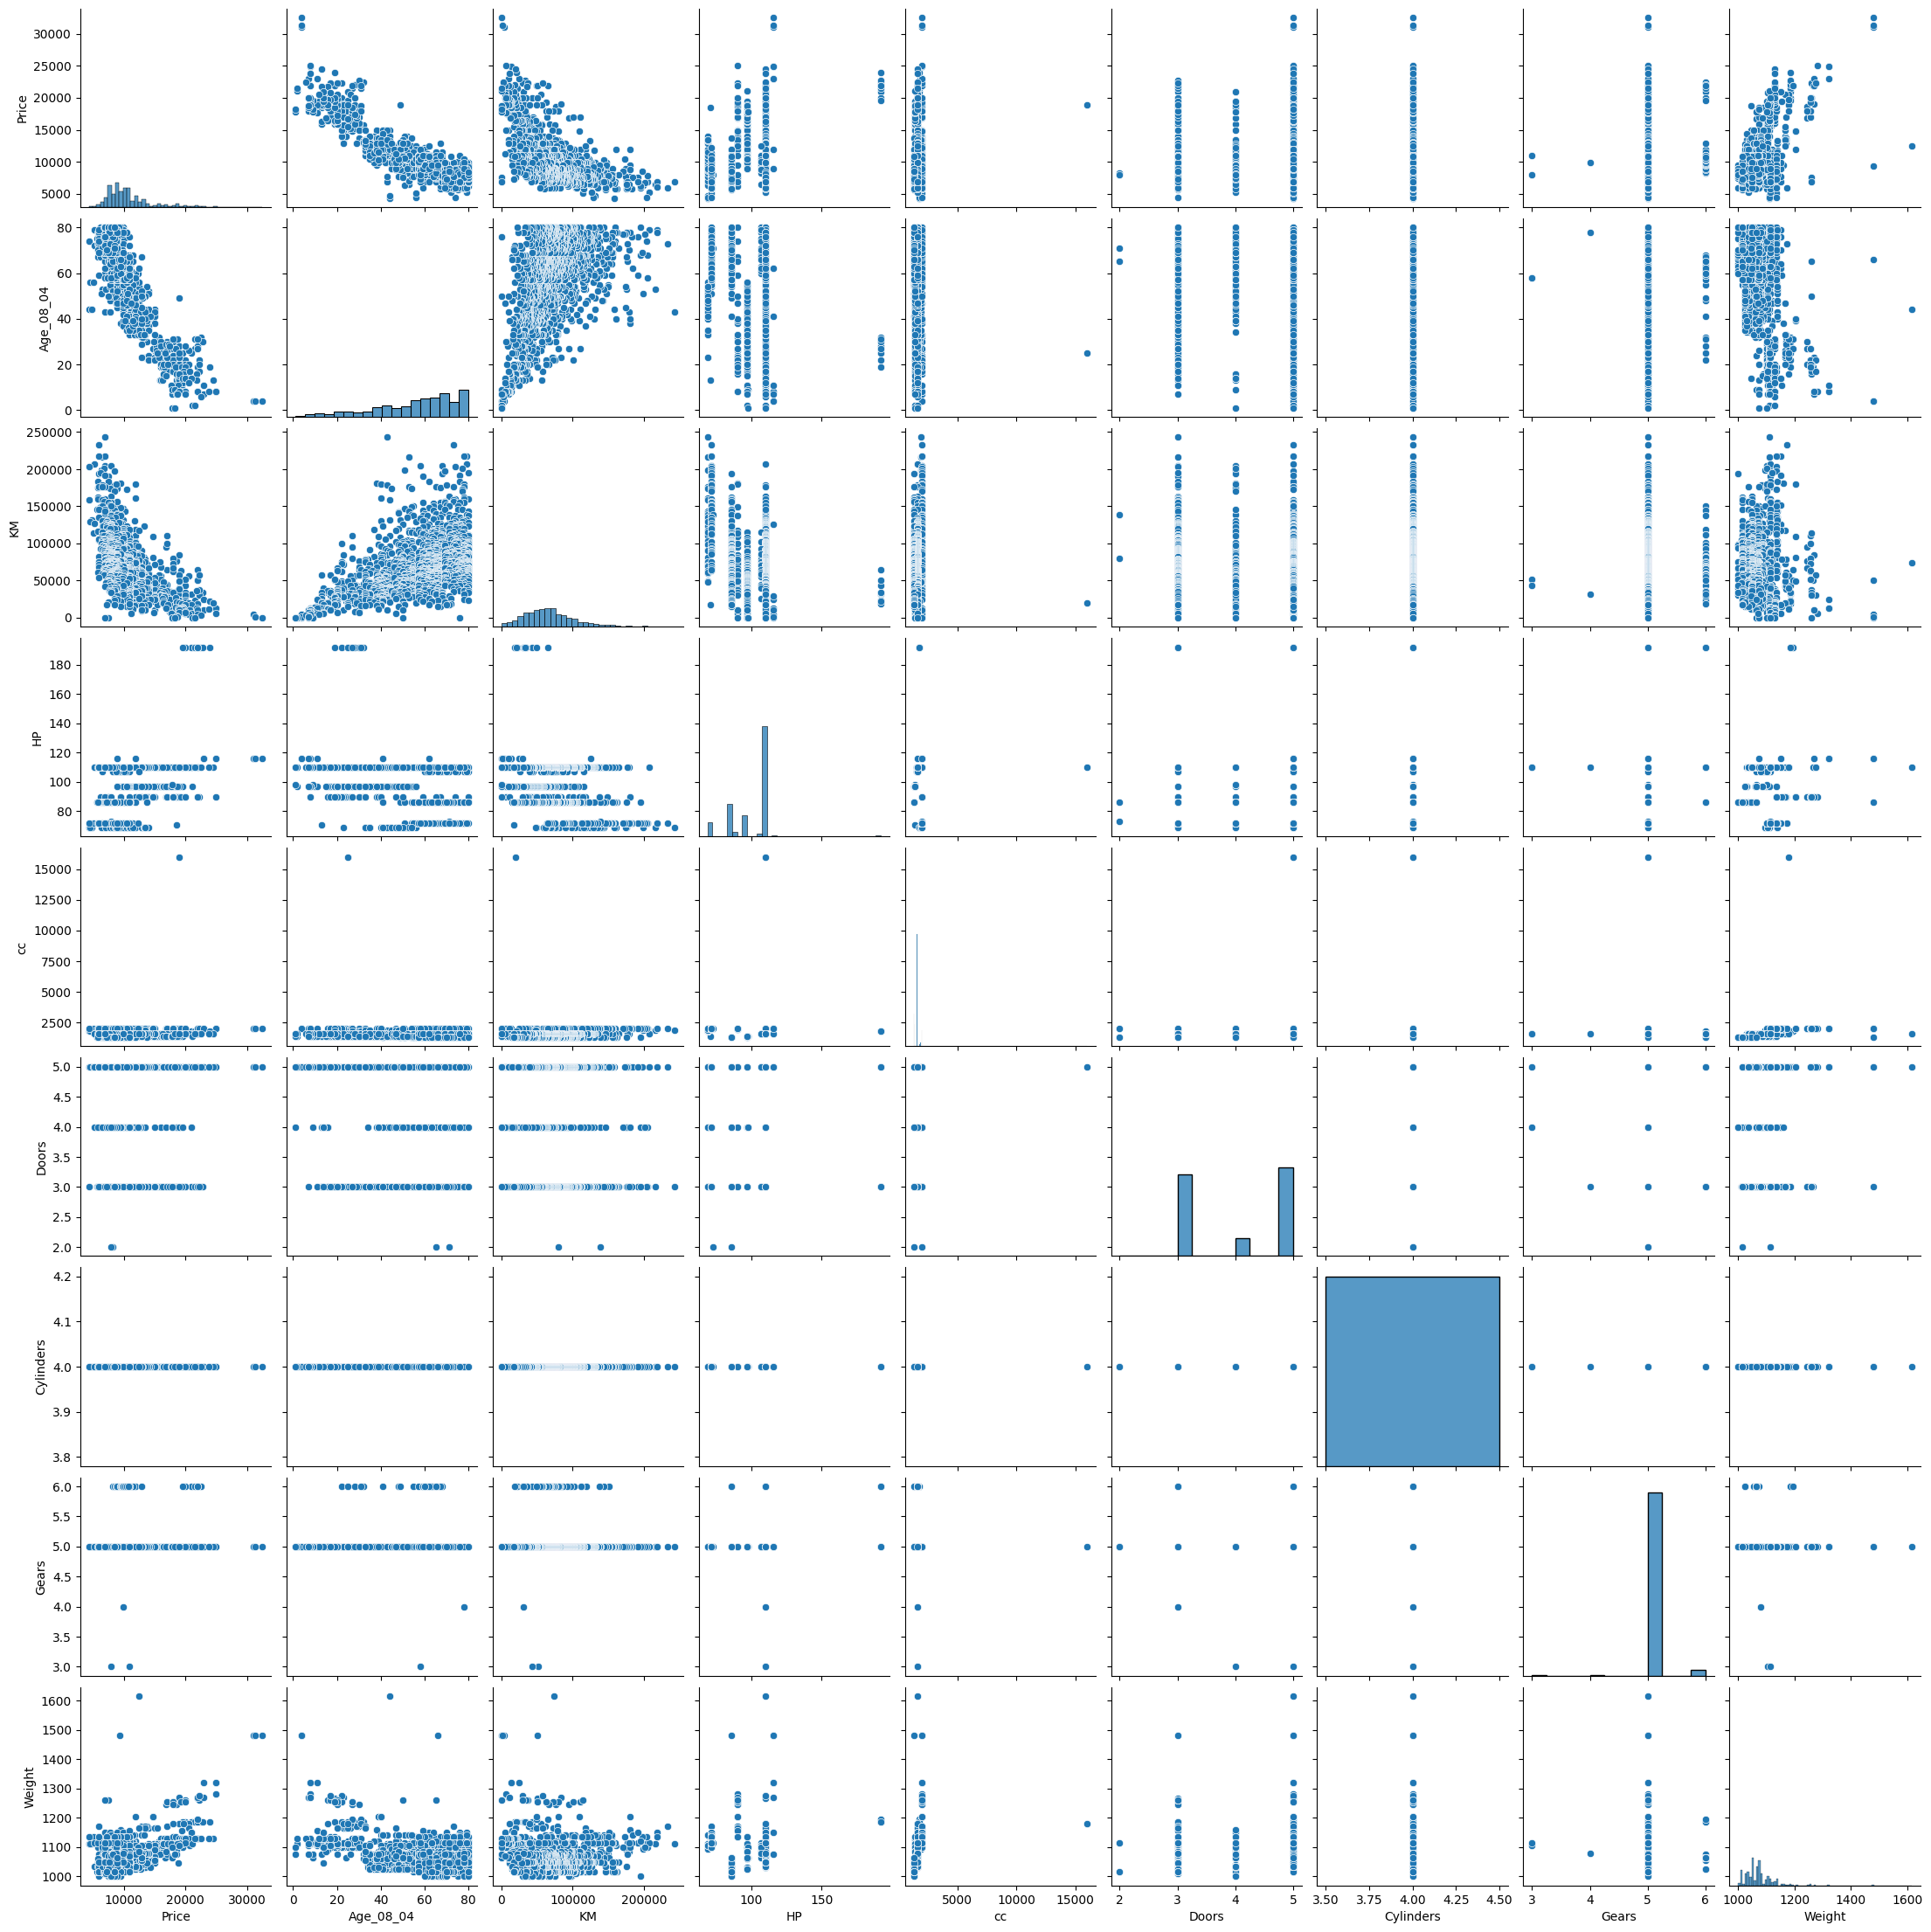

In [11]:
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']])
plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

OneHotEncoding categorical variable 'Fuel_Type'

In [13]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


Normalizing the numerical variables

In [14]:
scaler = StandardScaler()
numeric_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Displaying preprocessed data

In [15]:
print(df.head())

   Price  Age_08_04        KM        HP  Automatic        cc     Doors  \
0  13500  -1.771966 -0.574695 -0.768042          0  0.997419 -1.085139   
1  13750  -1.771966  0.117454 -0.768042          0  0.997419 -1.085139   
2  13950  -1.718184 -0.715386 -0.768042          0  0.997419 -1.085139   
3  14950  -1.610620 -0.547650 -0.768042          0  0.997419 -1.085139   
4  13750  -1.395491 -0.801028 -0.768042          0  0.997419 -1.085139   

   Cylinders     Gears    Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0        0.0 -0.140425  1.758561              True             False  
1        0.0 -0.140425  1.758561              True             False  
2        0.0 -0.140425  1.758561              True             False  
3        0.0 -0.140425  1.758561              True             False  
4        0.0 -0.140425  1.853577              True             False  


**Task 2: Split the Dataset**

In [16]:
from sklearn.model_selection import train_test_split

Defining features and target variable

In [17]:
X = df.drop('Price', axis=1)
y = df['Price']

In [18]:
X

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,0,0.997419,-1.085139,0.0,-0.140425,1.758561,True,False
1,-1.771966,0.117454,-0.768042,0,0.997419,-1.085139,0.0,-0.140425,1.758561,True,False
2,-1.718184,-0.715386,-0.768042,0,0.997419,-1.085139,0.0,-0.140425,1.758561,True,False
3,-1.610620,-0.547650,-0.768042,0,0.997419,-1.085139,0.0,-0.140425,1.758561,True,False
4,-1.395491,-0.801028,-0.768042,0,0.997419,-1.085139,0.0,-0.140425,1.853577,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,0,-0.652594,-1.085139,0.0,-0.140425,-0.901883,False,True
1432,0.863362,-1.321120,-1.035138,0,-0.652594,-1.085139,0.0,-0.140425,-1.091915,False,True
1433,0.809579,-1.374036,-1.035138,0,-0.652594,-1.085139,0.0,-0.140425,-1.091915,False,True
1434,0.755797,-1.376703,-1.035138,0,-0.652594,-1.085139,0.0,-0.140425,-1.091915,False,True


In [19]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


Splitting the dataset into training (80%) and testing (20%)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
899,0.325540,-0.246397,-1.035138,0,-0.652594,1.014941,0.0,-0.140425,-0.711851,False,True
881,0.648233,-0.185773,0.567440,0,0.054555,-0.035099,0.0,-0.140425,-0.711851,False,True
310,-0.857669,-0.796947,0.567440,0,0.054555,1.014941,0.0,-0.140425,0.143291,False,True
1145,1.024708,0.888736,0.567440,0,0.054555,1.014941,0.0,-0.140425,-0.046740,False,True
31,-1.825749,-0.889070,-0.300623,0,-0.416878,-1.085139,0.0,-0.140425,0.523355,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1095,1.078490,1.526796,0.567440,0,0.054555,-1.085139,0.0,-0.140425,-0.426804,False,True
1130,0.917144,1.028841,0.567440,0,0.054555,-1.085139,0.0,-0.140425,-0.426804,False,True
1294,1.293619,0.085528,0.567440,0,0.054555,1.014941,0.0,-0.140425,-0.046740,False,True
860,0.379322,-0.102505,-1.035138,0,-0.652594,-1.085139,0.0,-0.140425,-0.996899,False,True


In [21]:
X_test

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
594,-0.319847,-1.227770,-0.300623,0,-0.416878,-1.085139,0.0,-0.140425,-0.901883,False,True
754,0.648233,0.317196,0.567440,0,0.054555,-1.085139,0.0,-0.140425,-0.331788,False,True
630,0.164193,1.639402,-1.969976,0,0.997419,-0.035099,0.0,-0.140425,1.188466,True,False
1259,0.809579,0.199148,0.567440,0,0.054555,1.014941,0.0,-0.140425,-0.046740,False,True
903,0.486886,-0.254265,0.567440,0,0.054555,1.014941,0.0,-0.140425,0.048275,False,True
...,...,...,...,...,...,...,...,...,...,...,...
174,-2.578699,-1.566817,0.567440,0,0.054555,1.014941,0.0,-0.140425,1.093450,False,True
1428,0.863362,-1.134420,-1.035138,0,-0.652594,-1.085139,0.0,-0.140425,-1.091915,False,True
297,-0.857669,-0.725308,0.567440,0,0.054555,1.014941,0.0,-0.140425,0.143291,False,True
1435,1.078490,-1.827849,0.567440,0,0.054555,1.014941,0.0,-0.140425,0.789399,False,True


In [22]:
y_train

,Price
899,9500
881,9795
310,12950
1145,6450
31,15750
...,...
1095,6900
1130,7950
1294,6950
860,9750


In [23]:
y_test

,Price
594,10800
754,9950
630,7500
1259,9250
903,9750
...,...
174,21950
1428,8450
297,12850
1435,6950


In [24]:
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (1148, 11)
Testing data shape: (288, 11)


**Task 3: Build Multiple Linear Regression Models**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [43]:
features = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
target = 'Price'

In [44]:
X = df[features]
y = df[target]

In [45]:
X

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


In [46]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Defining categorical and numerical features

In [48]:
categorical_features = ['Fuel_Type', 'Automatic', 'Doors']
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Cylinders', 'Gears', 'Weight']

Creating preprocessing pipelines for numerical and categorical data

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

Creating the full pipeline with preprocessor and regressor

In [50]:
def create_model(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

Building Different Linear Regression Models

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Model 1: Simple Linear Regression

In [52]:
model1 = create_model(LinearRegression())
model1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'cc', 'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Automatic',
                                                   'Doors'])])),
                ('regressor', LinearRegression())])

Model 2: Ridge Regression

In [53]:
model2 = create_model(Ridge(alpha=1.0))
model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'cc', 'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Automatic',
                                                   'Doors'])])),
                ('regressor', Ridge())])

Model 3: Lasso Regression

In [54]:
model3 = create_model(Lasso(alpha=0.1))
model3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'cc', 'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Automatic',
                                                   'Doors'])])),
                ('regressor', Lasso(alpha=0.1))])

Interpreting the Coefficients

In [56]:
def print_coefficients(model, feature_names):
    preprocessor = model.named_steps['preprocessor']
    cat_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(cat_feature_names)
    coefs = model.named_steps['regressor'].coef_
    coef_df = pd.DataFrame(coefs, index=all_feature_names, columns=['Coefficient'])
    print(coef_df)

print("Linear Regression Coefficients:")
print_coefficients(model1, features)

Linear Regression Coefficients:
                   Coefficient
Age_08_04        -2.257873e+03
KM               -6.114653e+02
HP                1.752799e+02
cc               -1.476725e+01
Cylinders         7.815970e-14
Gears             1.173259e+02
Weight            1.376676e+03
Fuel_Type_CNG    -4.143066e+02
Fuel_Type_Diesel -5.971760e+02
Fuel_Type_Petrol  1.011483e+03
Automatic_0      -3.796189e+01
Automatic_1       3.796189e+01
Doors_2           3.584224e+02
Doors_3          -1.742385e+02
Doors_4           1.271825e+02
Doors_5          -3.113663e+02


In [57]:
print("\nRidge Regression Coefficients:")
print_coefficients(model2, features)


Ridge Regression Coefficients:
                  Coefficient
Age_08_04        -2255.804116
KM                -615.715148
HP                 180.913044
cc                 -15.338567
Cylinders            0.000000
Gears              117.528691
Weight            1366.907861
Fuel_Type_CNG     -404.024117
Fuel_Type_Diesel  -581.543306
Fuel_Type_Petrol   985.567422
Automatic_0        -40.947788
Automatic_1         40.947788
Doors_2            258.774664
Doors_3           -141.076336
Doors_4            155.461798
Doors_5           -273.160125


In [58]:
print("\nLasso Regression Coefficients:")
print_coefficients(model3, features)


Lasso Regression Coefficients:
                   Coefficient
Age_08_04        -2.257718e+03
KM               -6.117217e+02
HP                1.752530e+02
cc               -1.456698e+01
Cylinders         0.000000e+00
Gears             1.172344e+02
Weight            1.376123e+03
Fuel_Type_CNG    -5.128686e+02
Fuel_Type_Diesel -7.008207e+02
Fuel_Type_Petrol  9.061633e+02
Automatic_0      -7.425210e+01
Automatic_1       1.482530e-11
Doors_2           4.744867e+02
Doors_3          -6.715983e-03
Doors_4           2.999946e+02
Doors_5          -1.369144e+02


**Task 4: Evaluate Model Performance**

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

Evaluating all models

In [60]:
mse1, r2_1 = evaluate_model(model1, X_test, y_test)
mse2, r2_2 = evaluate_model(model2, X_test, y_test)
mse3, r2_3 = evaluate_model(model3, X_test, y_test)

In [61]:
print(f"Linear Regression: MSE={mse1:.2f}, R^2={r2_1:.2f}")
print(f"Ridge Regression: MSE={mse2:.2f}, R^2={r2_2:.2f}")
print(f"Lasso Regression: MSE={mse3:.2f}, R^2={r2_3:.2f}")

Linear Regression: MSE=2232352.83, R^2=0.83
Ridge Regression: MSE=2223131.84, R^2=0.83
Lasso Regression: MSE=2231946.81, R^2=0.83


**Task 5: Apply Lasso and Ridge Methods**

Ridge Regression:

In [62]:
model2 = create_model(Ridge(alpha=1.0))
model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'cc', 'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Automatic',
                                                   'Doors'])])),
                ('regressor', Ridge())])

Lasso Regression:

In [64]:
model3 = create_model(Lasso(alpha=0.1))
model3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'cc', 'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Automatic',
                                                   'Doors'])])),
                ('regressor', Lasso(alpha=0.1))])

**Interview Questions**

**1. What is Normalization & Standardization and how is it helpful?**

**Normalization:**

Normalization (or Min-Max Scaling) adjusts the range of features to a specific scale, usually [0, 1].

This helps ensure that features with larger ranges don’t disproportionately influence the model.

**Standardization:**

Standardization (or Z-score Normalization) scales features so they have a mean of 0 and a standard deviation of 1.

This helps the model converge more quickly and can be beneficial if the features are on different scales.

Both techniques are crucial for models that are sensitive to the scale of features, such as linear regression and gradient-based algorithms.

**2. What techniques can be used to address multicollinearity in multiple linear regression?**

Techniques that can be used to address multicollinearity in multiple linear regression are:

**Removing Variables:**

Identify and remove highly correlated features.

**Principal Component Analysis (PCA):**

Transform the features into a set of linearly uncorrelated components.

**Regularization:**

Techniques like Ridge or Lasso regression add a penalty to the size of the coefficients, which can help mitigate multicollinearity.

**Variance Inflation Factor (VIF):**

Calculate VIF for each feature; high values indicate multicollinearity. Remove or combine features accordingly.